# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

### Exercise 04.1 - Molecular Dynamics

For molecular dynamics simulations, we use the **Verlet algorithm**. This is an efficient and stable algorithm used to calculate the position and velocities of particles over time. The efficiency of this algorithm lies in the fact that it computes particle positions based on the previous ones without requiring the calculation of velocities step-by-step. The calculation of the position is therefore given by the third-order Taylor expansion:

$$\vec r(t+dt) = 2 \vec r(t)-\vec r(t-dt) +\vec a(t) dt^2$$

Every pair of particles is subject to a Lennard-Jones potential.

Knowing the position and velocity of each particle in the system, we can calculate its thermodynamic properties: total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$.

#### Periodic Boundary Conditions


Periodic Boundary Conditions (sometimes humorously referred to as the "Pacman effect") are useful for simulating the presence of an infinite number of particles by calculating a finite, reduced number of them. Essentially, this means envisioning a world that repeats periodically in all directions, allowing us to compute the behavior within a cubic volume of side length L containing N particles. If the dynamics carry a particle outside this volume, it will re-enter from the opposite side with the same velocity.

#### Cutoff radius

The cutoff radius is an arbitrary distance that represents the sphere of influence of each particle. The LJ potential has an infinite range; therefore, theoretically, each particles influences the behavior of all others. The cutoff is a truncation of the potential that makes the calculation feasible but introduces the need for a correction. Higher cutoff values reduce inaccuracies but increase the computational complexity.

Via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$


#### Start the simulations: equilibration of the system
Each simulation begins with a perfect crystalline configuration. It is necessary to allow the system some time to evolve on its own before it can be considered in equilibrium and measurements can be extracted from it. This procedure is known as equilibration.

Furthermore, it is worth noting that the input temperature does not necessarily manifest itself in the measured temperature because the distribution of energy is left to the simulation. To obtain the measured temperature, adjustments were made to the input parameter so that the measurement matched the problem's requirements.

The parameters chosen for the simulation, in Lennard-Jones units following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

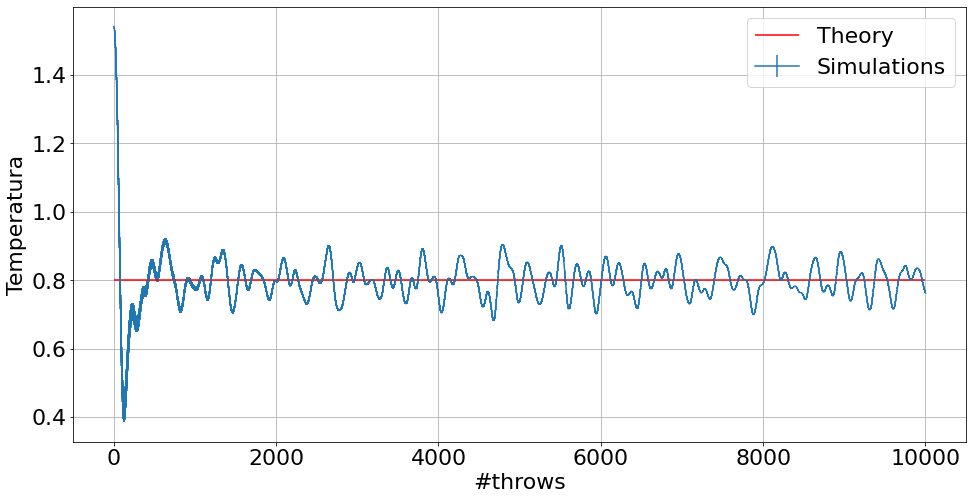

In [34]:
x,s,err = np.loadtxt("./data/outputeq_temp_solid.dat", usecols=(0,1,3), unpack='true')

fig = plt.figure(figsize = (16,8) )
plt.errorbar(x,s,yerr=err,label="Simulations")
plt.hlines(0.8,0,10000,color ="red",label="Theory")
plt.xlabel('#throws')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()


After 2k throws the Temperature same to be equilibrate. Actually, average temperature and theory temperature, after tk throws is under 1%.
I set the temperature to equilibrate equal at 1.5414

In [2]:
abs(np.mean(s[2000:])-0.8)

0.001250587999999997

After a calibration procedure it is possible estimate the values of the following quantities: Total Energy, Potential energy,Kinetic energy,Pressure,Temperature.

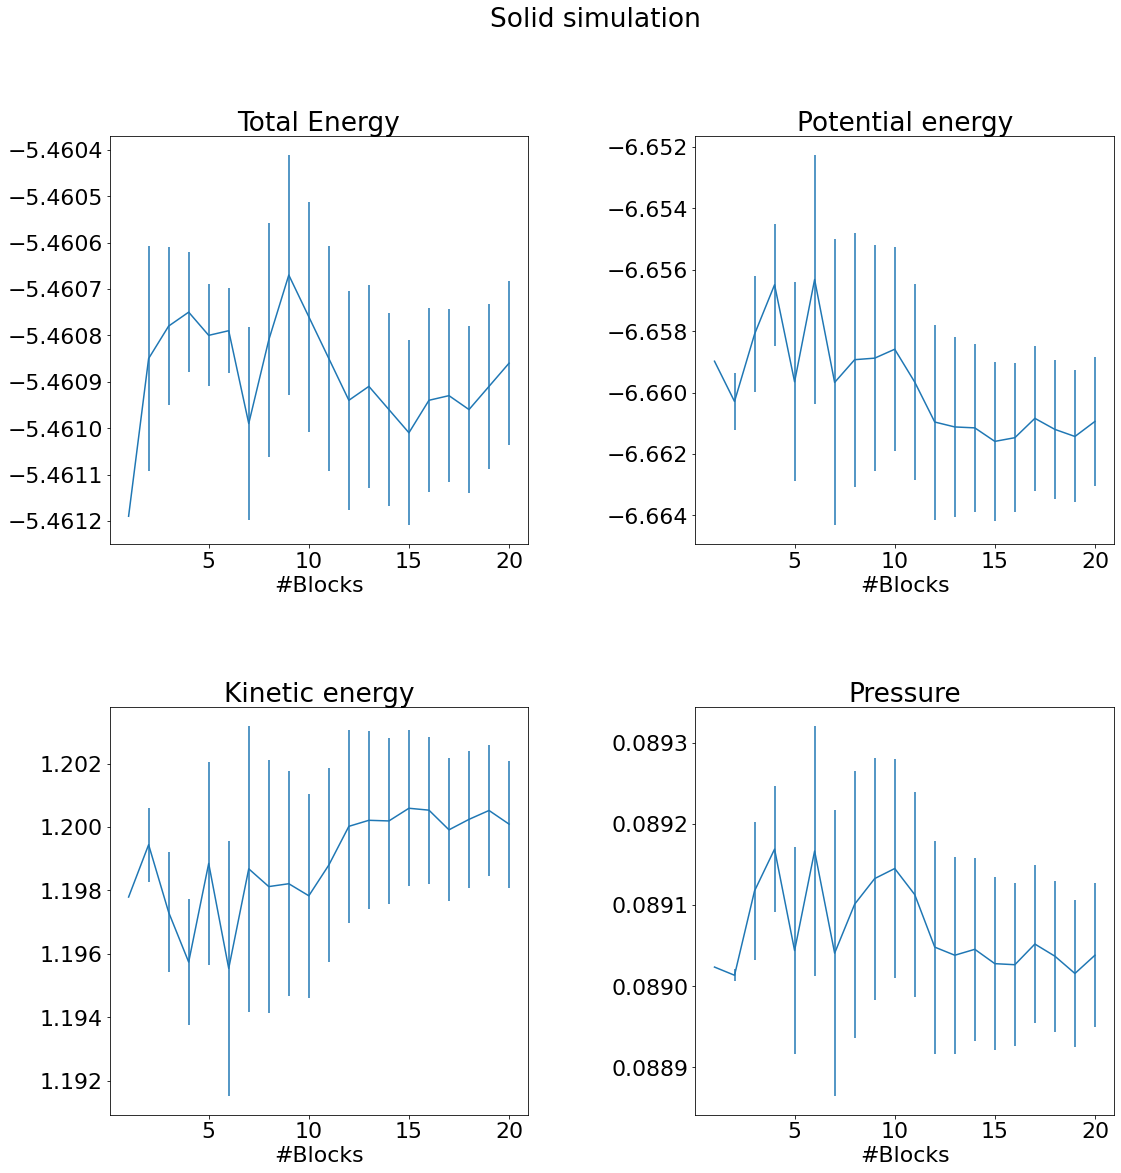

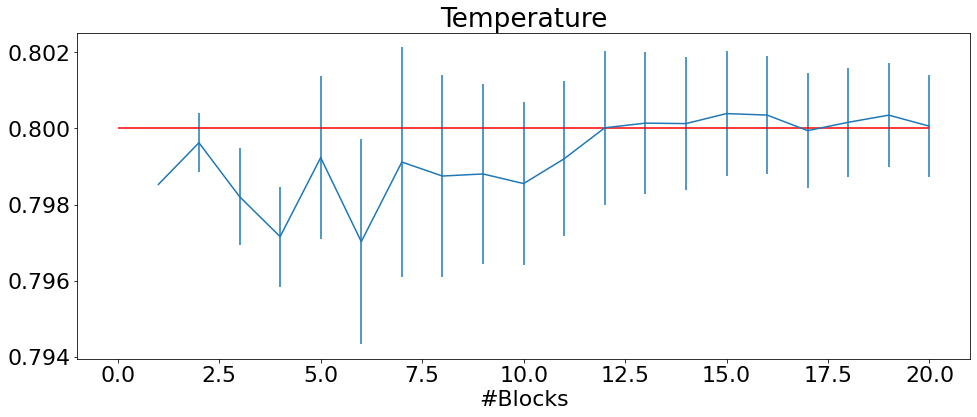

In [22]:
file_name =["etot","epot","ekin","pres","temp"]
labels = ["Total Energy","Potential energy","Kinetic energy","Pressure","Temperature"]
fig, axs = plt.subplots(2, 2,figsize=(18,18))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x = []; s = []; err = []
for count in range(5):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[count]}_solid.dat", usecols=(0,2,3), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count],yerr=err[count])
        a.set_title(f'{labels[count]}')
        a.set_xlabel('#Blocks')
        count = count+1

fig_t, ax_t = plt.subplots(figsize=(16,6))
ax_t.set_title('Temperature')
ax_t.set_xlabel('#Blocks')
ax_t.errorbar(x[4],s[4],yerr= err[4])
ax_t.hlines(0.8,0,20,color ="red",label="theory")
fig.suptitle('Solid simulation')

plt.show()


### Exercise 4.2 - liquid
The final geometrical configuration of the Solid is the new initial configuration for the liquid.
applying 20000 throws we found that the temperature T which equilibrate to T* = 1.1.



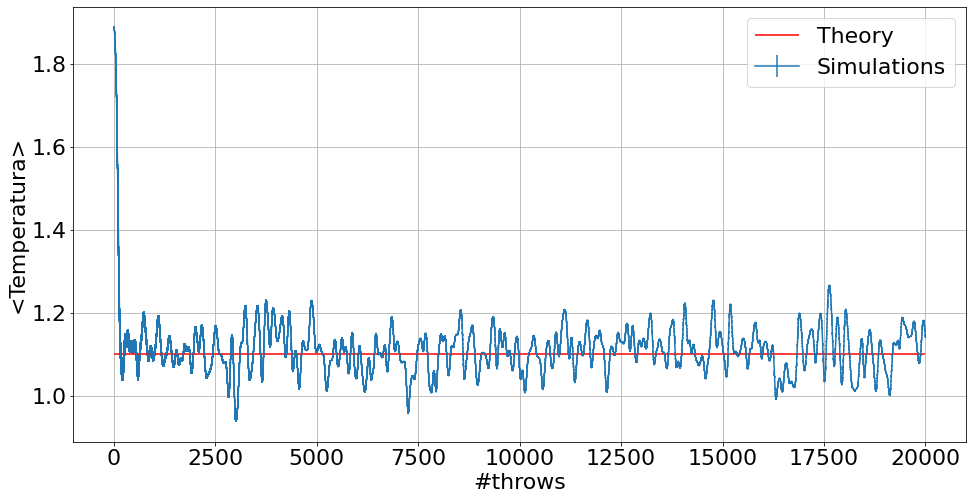

In [28]:
fig = plt.figure(figsize = (16,8) )
x,temp,err = np.loadtxt("./data/outputeq_temp_liquid.dat", usecols=(0,1,3), unpack='true')

plt.errorbar(x,temp,yerr=err,label="Simulations")
plt.hlines(1.1,0,20000,color ="red",label="Theory")
plt.xlabel('#throws')
plt.ylabel('<Temperatura>')
plt.legend()
plt.grid(True)
plt.show()


After 5k throws the Temperature same to be equilibrate. Actually, average temperature and theory temperature, after tk throws is under 1%.
I set the temperature to equilibrate equal at 1.888815

In [5]:
abs(np.mean(temp[5000:])-1.1)

0.007427385399999764

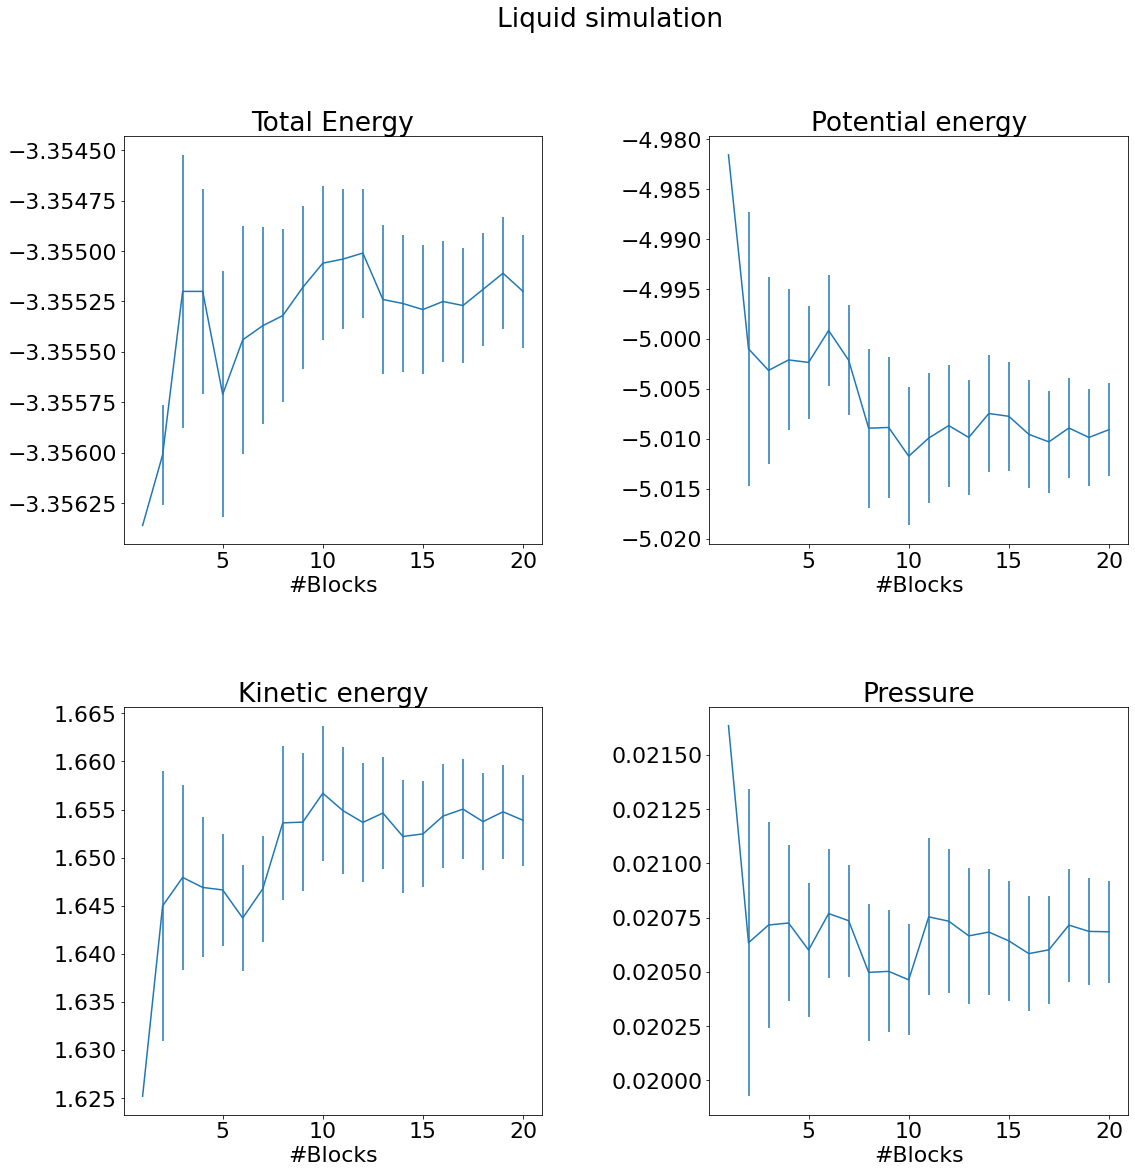

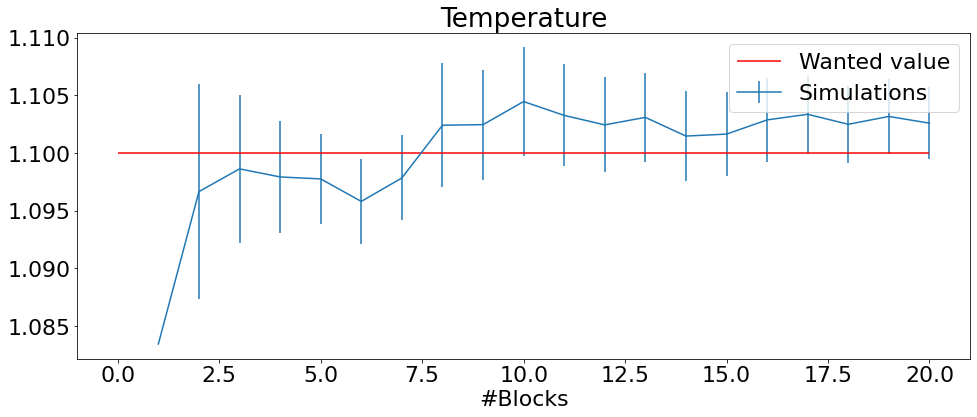

In [36]:
file_name =["etot","epot","ekin","pres","temp"]
labels = ["Total Energy","Potential energy","Kinetic energy","Pressure","Temperature"]
fig, axs = plt.subplots(2, 2,figsize=(18,18))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x = []; s = []; err = []
for count in range(5):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[count]}_liquid.dat", usecols=(0,2,3), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count],yerr=err[count])
        a.set_title(f'{labels[count]}')
        count = count+1
        a.set_xlabel('#Blocks')

fig_t, ax_t = plt.subplots(figsize=(16,6))
ax_t.set_title('Temperature')
ax_t.errorbar(x[4],s[4],yerr= err[4],label="Simulations")
ax_t.hlines(1.1,0,20,color ="red",label="Wanted value")
ax_t.set_xlabel("#Blocks")
plt.legend()
fig.suptitle('Liquid simulation')

plt.show()

### Exercise 4.2 - gas
The final geometrical configuration of the Liwuid is the new initial configuration for the Gas.
In the gas simulation the numerical density is so rarefied that the simulations required higher statistic. For this reason equilibrium trend is been smoothed using 100 blocks, each of them of 2500 throws.
The plot below shows the temperature trend reachign the equilibrium at T*  = 1.2.
The initial temperature is choosen equal to T = 0.955.

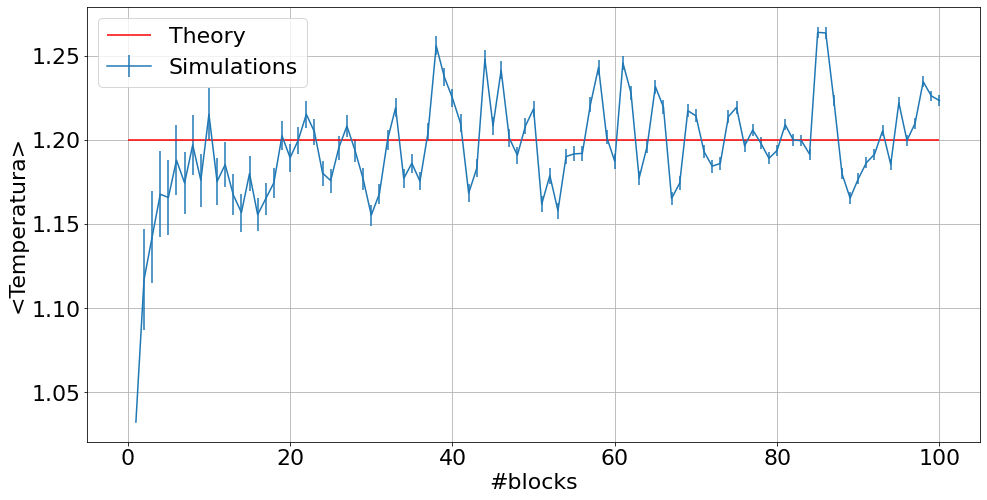

In [30]:
x,temp,err = np.loadtxt("./data/outputeq_temp_gas.dat", usecols=(0,1,3), unpack='true')

fig = plt.figure(figsize = (16,8) )
plt.errorbar(x,temp,yerr=err,label="Simulations")
plt.hlines(1.2,0,100,color ="red",label="Theory")
plt.xlabel('#blocks')
plt.ylabel('<Temperatura>')
plt.legend()
plt.grid(True)
plt.show()


After 40000 throws the equilibrium is reached and we proceed to compute the thermodinamic quantities.

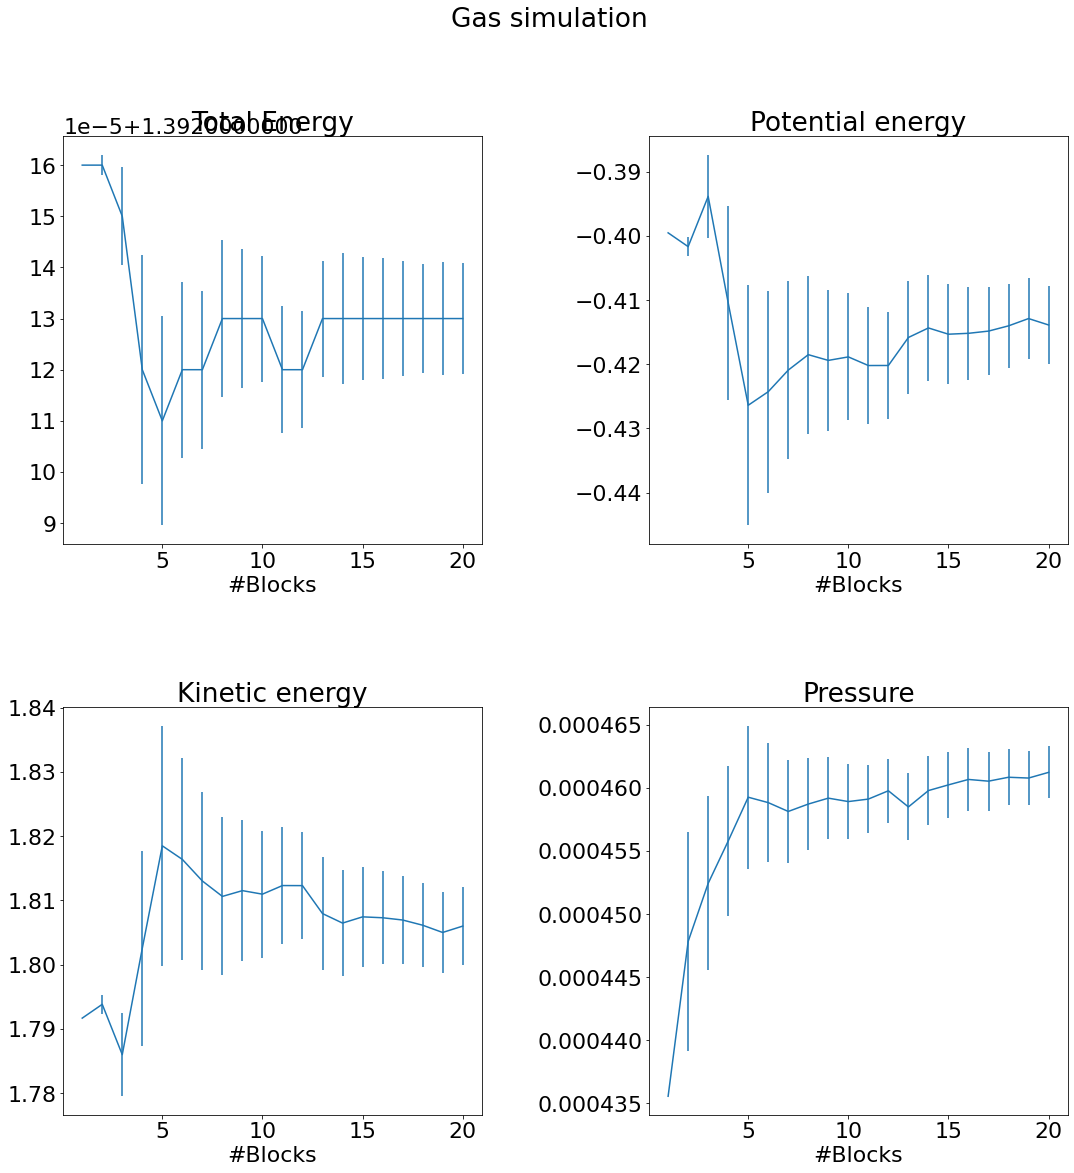

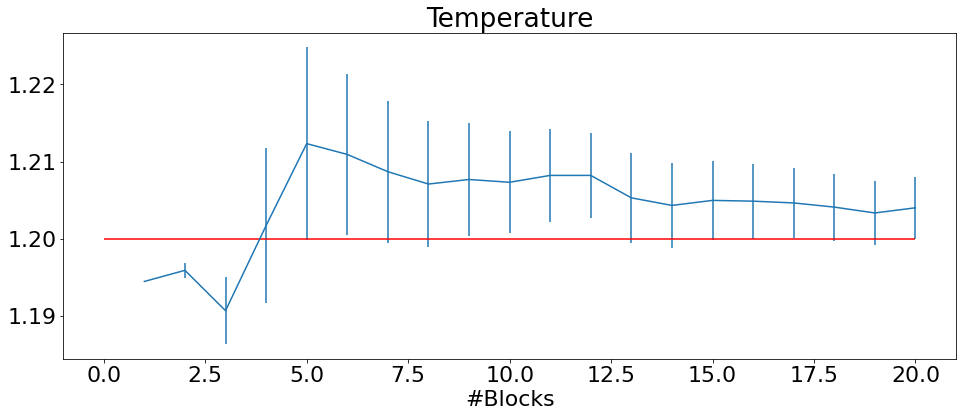

In [32]:
file_name =["etot","epot","ekin","pres","temp"]
labels = ["Total Energy","Potential energy","Kinetic energy","Pressure","Temperature"]
fig, axs = plt.subplots(2, 2,figsize=(18,18))
plt.subplots_adjust(wspace=0.4, hspace=0.4)


x = []; s = []; err = []
for count in range(5):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[count]}_gas.dat", usecols=(0,2,3), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count],yerr=err[count])
        a.set_title(f'{labels[count]}')
        count = count+1
        a.set_xlabel('#Blocks')

fig_t, ax_t = plt.subplots(figsize=(16,6))
ax_t.set_title('Temperature')
ax_t.errorbar(x[4],s[4],yerr= err[4])
ax_t.hlines(1.2,0,20,color ="red",label="theory")
ax_t.set_xlabel('#Blocks')
fig.suptitle('Gas simulation')

plt.show()

#### Observation

Unlike the other thermodynamic phases where a statistics was obtained using 20 blocks of 1000 throws each, here it was necessary to use **larger blocks, of 20000 throws each**, in order to account for any fluctuations with periodicity observed during the equilibration process.

The constant behavior of the internal energy for the final gas values could be attributed to the chosen block size. It might be necessary to redo the previous measurements with larger blocks.